# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import json
import requests
from api_keys import weather_api_key,g_key
import random 
import pandas as pd 
import time 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
from citipy import citipy 
import csv
import urllib
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [30]:
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, long)

# Identify nearest city for each lat, lng combination
for ll in lat_long:
    city = citipy.nearest_city(ll[0], ll[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=ed3bf421d7f1d280966f00c1b0c03bd4&units=imperial'

In [32]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        latitute = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        max_temperature = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": latitute, 
                          "Lng": longitude, 
                          "Max Temp": max_temperature,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found...Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | msanga
Processing Record 3 of Set 1 | rutul
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | kendari
Processing Record 6 of Set 1 | portland
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | itaituba
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | fort nelson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | xining
Processing Record 16 of Set 1 | jega
Processing Record 17 of Set 1 | bull savanna
Processing Record 18 of Set 1 | penzance
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | dunda
Processing Record 22 of Set 1 | barentsburg
City not found...Skipping...
Processing Record 23 of Se

Processing Record 36 of Set 4 | ndioum
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | burnie
Processing Record 39 of Set 4 | lantawan
Processing Record 40 of Set 4 | venado tuerto
Processing Record 41 of Set 4 | zhanakorgan
Processing Record 42 of Set 4 | santa maria
Processing Record 43 of Set 4 | karpinsk
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | north myrtle beach
Processing Record 46 of Set 4 | mahadday weyne
City not found...Skipping...
Processing Record 47 of Set 4 | valparaiso
Processing Record 48 of Set 4 | marsh harbour
Processing Record 49 of Set 4 | esmeralda
Processing Record 0 of Set 5 | belushya guba
City not found...Skipping...
Processing Record 1 of Set 5 | moose factory
Processing Record 2 of Set 5 | tsihombe
City not found...Skipping...
Processing Record 3 of Set 5 | winneba
Processing Record 4 of Set 5 | tias
Processing Record 5 of Set 5 | hervey bay
Processing Record 6 of Set 5 | salalah
Processing Record 7 of 

Processing Record 26 of Set 8 | aktau
Processing Record 27 of Set 8 | hami
Processing Record 28 of Set 8 | karasjok
Processing Record 29 of Set 8 | salisbury
Processing Record 30 of Set 8 | biedenkopf
Processing Record 31 of Set 8 | mys shmidta
City not found...Skipping...
Processing Record 32 of Set 8 | sulangan
Processing Record 33 of Set 8 | san cristobal
Processing Record 34 of Set 8 | skibbereen
Processing Record 35 of Set 8 | kathu
Processing Record 36 of Set 8 | marcona
City not found...Skipping...
Processing Record 37 of Set 8 | yurimaguas
Processing Record 38 of Set 8 | sao miguel do araguaia
Processing Record 39 of Set 8 | maldonado
Processing Record 40 of Set 8 | yaring
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | anadyr
Processing Record 43 of Set 8 | tchollire
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | prado
Processing Record 46 of Set 8 | krasnoselkup
Processing Record 47 of Set 8 | ixtapa
Processing Record 48 of Set

Processing Record 15 of Set 12 | poshekhonye
Processing Record 16 of Set 12 | hay river
Processing Record 17 of Set 12 | gopalpur
Processing Record 18 of Set 12 | kourou
Processing Record 19 of Set 12 | puerto cabello
Processing Record 20 of Set 12 | rameswaram
Processing Record 21 of Set 12 | bobonong
City not found...Skipping...
Processing Record 22 of Set 12 | ipira
Processing Record 23 of Set 12 | valley city
Processing Record 24 of Set 12 | belaya gora
Processing Record 25 of Set 12 | solwezi
Processing Record 26 of Set 12 | mmabatho
Processing Record 27 of Set 12 | sahrak
City not found...Skipping...
Processing Record 28 of Set 12 | daxian
City not found...Skipping...
Processing Record 29 of Set 12 | lexington
Processing Record 30 of Set 12 | basco
Processing Record 31 of Set 12 | voh
Processing Record 32 of Set 12 | anage
Processing Record 33 of Set 12 | karakendzha
City not found...Skipping...
Processing Record 34 of Set 12 | antalaha
Processing Record 35 of Set 12 | denpasar
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_data_df = pd.DataFrame(city_data)

# Export the city_data_df into a csv
city_data_df.to_csv("../output_data/WeatherPy.csv",encoding="utf-8",index=False)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,52.81,66,46,5.08,ZA,1627333204
1,msanga,-6.0500,36.0333,60.71,55,62,5.73,TZ,1627333205
2,rutul,41.5357,47.4239,62.51,91,0,0.16,RU,1627333206
3,hithadhoo,-0.6000,73.0833,80.20,80,95,7.70,MV,1627333207
4,kendari,-3.9450,122.4989,70.12,93,32,2.91,ID,1627333208


In [34]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,18.923349,15.301728,70.694991,69.131624,55.203419,7.925538,1.627333e+09
std,32.991284,88.930882,14.541740,21.899946,38.378406,5.529200,8.160994e+01
min,-54.800000,-179.166700,30.900000,7.000000,0.000000,0.000000,1.627333e+09
25%,-8.116700,-60.673300,60.710000,56.000000,16.000000,4.000000,1.627333e+09
50%,20.516900,16.531200,71.490000,76.000000,63.000000,6.910000,1.627333e+09
75%,46.632800,90.092800,80.730000,85.000000,95.000000,10.510000,1.627333e+09
max,78.218600,179.316700,107.280000,100.000000,100.000000,35.500000,1.627333e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

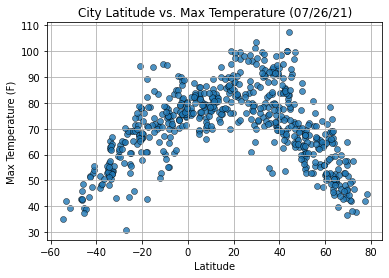

In [35]:
# Build scatter plot 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Temperature.png")

# Show plot
plt.show()

Temperature is maximum between the latitude of 20- 40


## Latitude vs. Humidity Plot

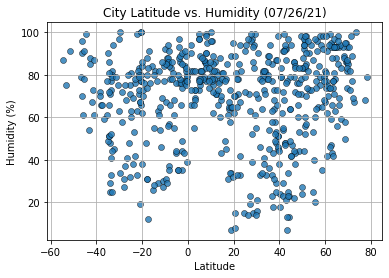

In [36]:

# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

As the latitude increases, humidity is also increased

## Latitude vs. Cloudiness Plot

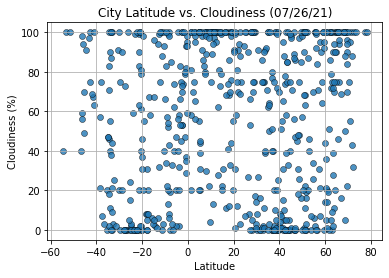

In [37]:
# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Cloudiness .png")

# Show plot
plt.show()

Data is wide spread for Latitude vs Cloudiness

## Latitude vs. Wind Speed Plot

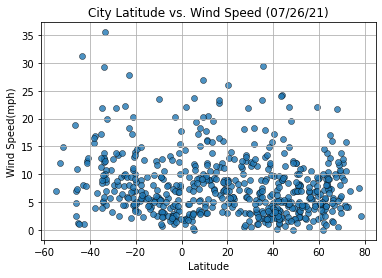

In [38]:
# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Wind Speed .png")

# Show plot
plt.show()

Wind data is spread across the latitude

## Linear Regression

In [39]:
n_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
s_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

In [40]:
# Defining Functions
def linear_agression(x_axis,y_axis):
    print(f"The r-value is : {round(st.pearsonr(x_axis, y_axis)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis,regress_values,"r-")
    return line_eq


def annotate(line_eqa, a, b):
    plt.annotate(line_eqa,(a,b),fontsize=10,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.65


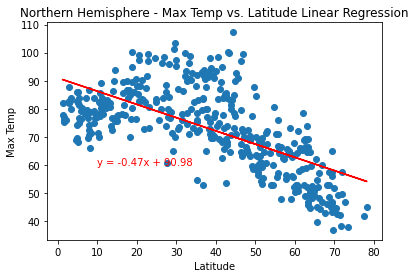

In [49]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Max Temp"])
annotate(equation, 10, 60)

#properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a negative corelation between latitude and maximum temperature in northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.77


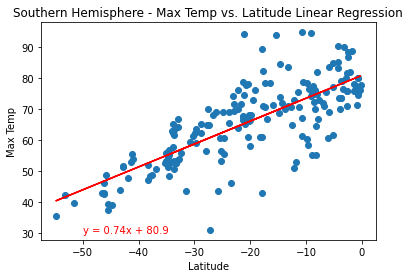

In [42]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Max Temp"])
annotate(equation, -50, 30)

#properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive corelation between latitude and maximum temperature in southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.04


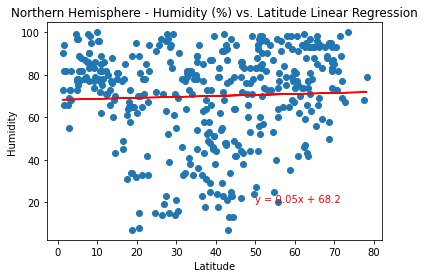

In [43]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Humidity"])
annotate(equation, 50, 20)

#properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak positive corelation between latitude and humidity temperature in northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.01


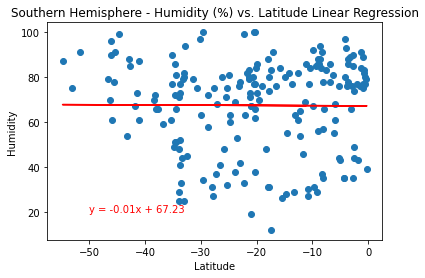

In [44]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Humidity"])
annotate(equation, -50, 20)

#properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak negative corelation between latitude and humidity temperature in southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.12


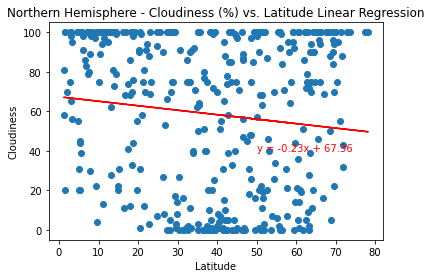

In [45]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Cloudiness"])
annotate(equation, 50, 40)

#properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak negative corelation between latitude and cloudiness in northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.02


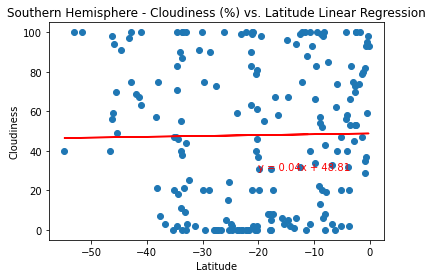

In [46]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Cloudiness"])
annotate(equation, -20, 30)

#properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive corelation between latitude and cloudiness in southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.14


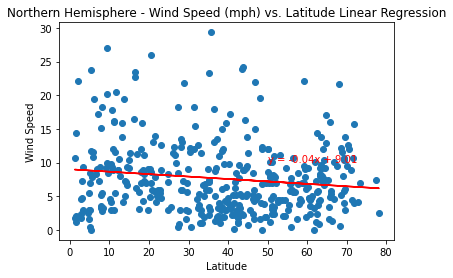

In [47]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Wind Speed"])
annotate(equation, 50, 10)

#properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a weak negative corelation between latitude and wind speend in northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.3


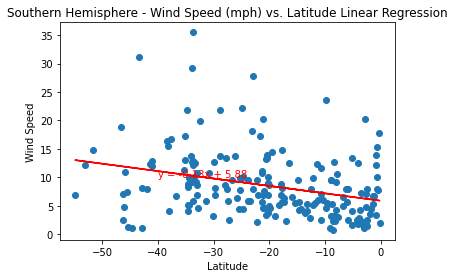

In [48]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Wind Speed"])
annotate(equation, -40, 10)

#properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a negative corelation between latitude and wind speend in southern hemisphere